In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from WindPy import w
import empyrical
import datetime as dt
%matplotlib inline

In [277]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [278]:
def metric(ret):
    print(empyrical.annual_return(ret))
    print(empyrical.annual_volatility(ret))
    print(empyrical.max_drawdown(ret))
    print(empyrical.sharpe_ratio(ret))

In [279]:
start_date = '2016-01-01'

In [280]:
end_date = dt.datetime.today().strftime('%Y-%m-%d')

# 计算行业基金收益率

In [281]:
sfund = pd.read_excel('../data/基金池.xlsx', sheet_name='行业')

In [282]:
sfund

,code,name,tag
0,000251.OF,工银瑞信金融地产,金融地产
1,110022.OF,易方达消费行业,可选消费
2,110023.OF,易方达医疗保健,必选医药
3,110013.OF,易方达科翔,信息科技


In [283]:
data = w.wsd(sfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [284]:
sfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [285]:
sfund_nav_ret = sfund_nav.pct_change()

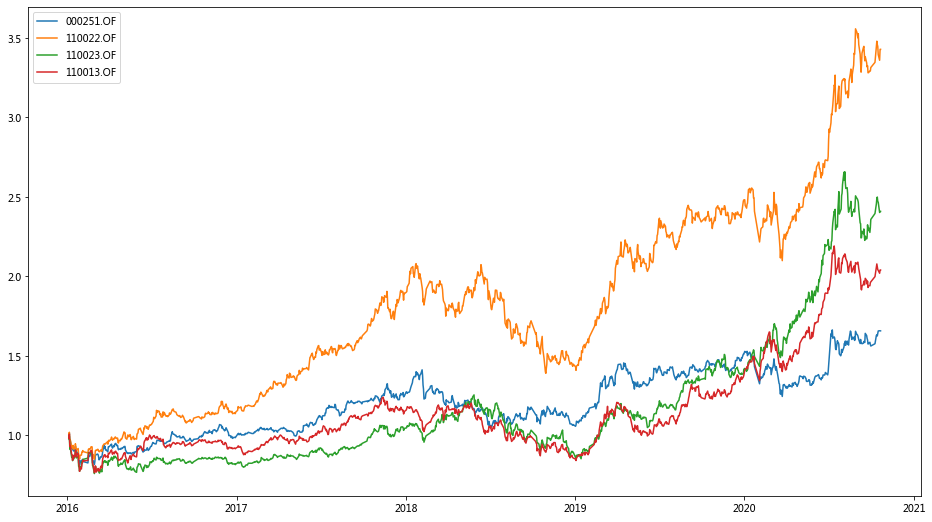

In [286]:
(1 + sfund_nav_ret).cumprod().plot(figsize=(16, 9))

In [287]:
sector_fund_ret = 0.2 * sfund_nav_ret[sfund[sfund['tag'] == '金融地产']['code']].mean(axis=1) + \
                  0.3 * sfund_nav_ret[sfund[sfund['tag'] == '可选消费']['code']].mean(axis=1) + \
                  0.2 * sfund_nav_ret[sfund[sfund['tag'] == '必选医药']['code']].mean(axis=1) + \
                  0.3 * sfund_nav_ret[sfund[sfund['tag'] == '信息科技']['code']].mean(axis=1)

# 计算全市场基金收益率

In [288]:
fund = pd.read_excel('../data/基金池.xlsx', sheet_name='全市场')

In [289]:
data = w.wsd(fund['code'].tolist(), 'nav_adj', start_date, end_date)

In [290]:
fund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [291]:
fund_ret = fund_nav.pct_change()

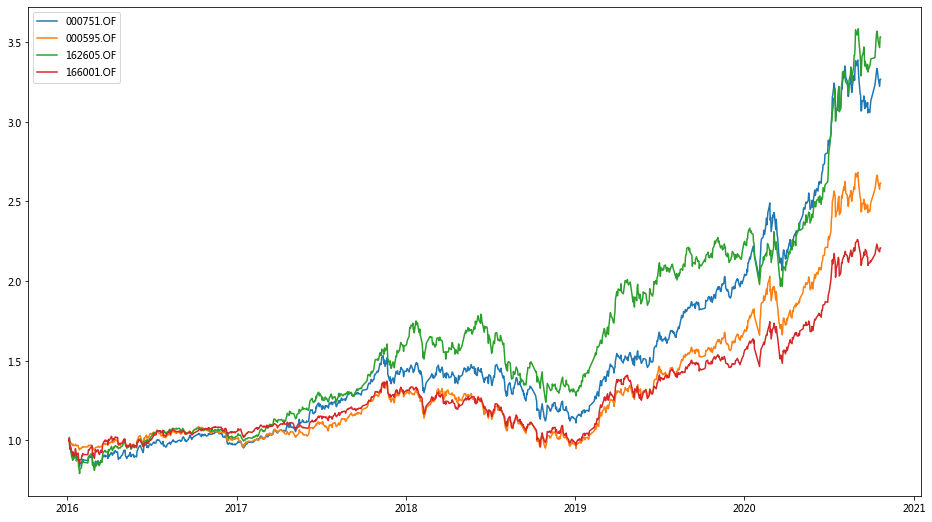

In [292]:
(1 + fund_ret).cumprod().plot(figsize=(16, 9))

In [293]:
fund_pf_ret = fund_ret.mean(axis=1)

# 计算债券基金收益率

In [294]:
bfund = pd.read_excel('../data/基金池.xlsx', sheet_name='债券')

In [295]:
data = w.wsd(bfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [296]:
bfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [297]:
bfund_ret = bfund_nav.pct_change()

In [298]:
bfund_pf_ret = bfund_ret.mean(axis=1)

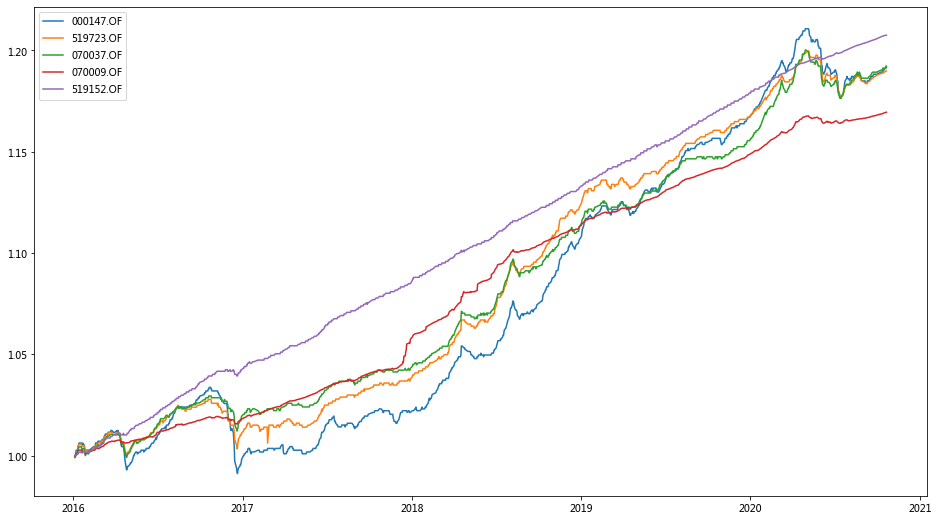

In [299]:
(1 + bfund_ret).cumprod().plot(figsize=(16, 9))

# 计算组合收益率

In [321]:
pf_ret_19 = 0.9 * bfund_pf_ret + 0.05 * sector_fund_ret + 0.05 * fund_pf_ret
pf_ret_28 = 0.8 * bfund_pf_ret + 0.1 * sector_fund_ret + 0.1 * fund_pf_ret
pf_ret_55 = 0.5 * bfund_pf_ret + 0.25 * sector_fund_ret + 0.25 * fund_pf_ret
pf_ret_46 = 0.6 * bfund_pf_ret + 0.2 * sector_fund_ret + 0.2 * fund_pf_ret
pf_ret_37 = 0.7 * bfund_pf_ret + 0.15 * sector_fund_ret + 0.15 * fund_pf_ret

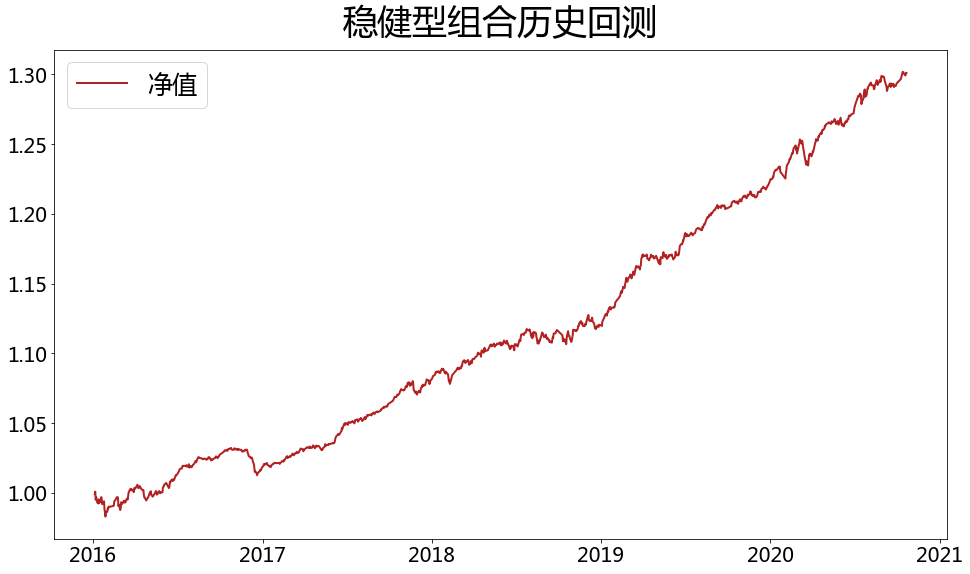

In [322]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_19).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_55).cumprod(), label='平衡型', color='blue')
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('稳健型组合历史回测', fontsize=35, y=1.02)

In [239]:
(1 + pf_ret_28).cumprod().tail()

2020-10-14    1.421864
2020-10-15    1.420264
2020-10-16    1.418838
2020-10-19    1.415982
2020-10-20    1.415982
dtype: float64

In [241]:
pf_ret_28.index = pd.to_datetime(pf_ret_28.index)

In [242]:
pf_ret_28.resample('Y').apply(lambda x: empyrical.cum_returns_final(x))

2016-12-31    0.017479
2017-12-31    0.093205
2018-12-31    0.009206
2019-12-31    0.143885
2020-12-31    0.102729
Freq: A-DEC, dtype: float64

In [231]:
metric(pf_ret_28)

0.058216013835937774
0.02091472563510247
-0.018988425388889667
2.7185611144065858


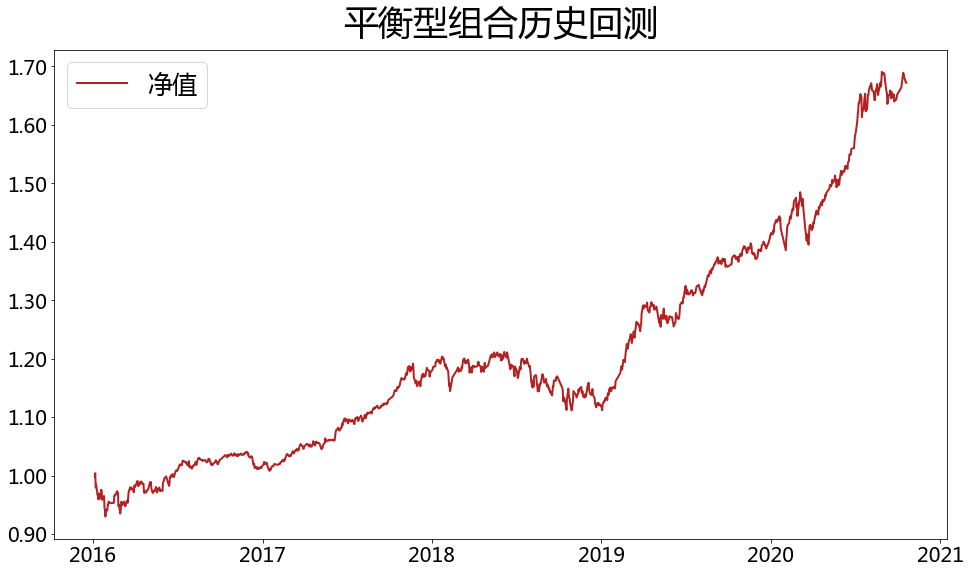

In [224]:
fig, ax = plt.subplots(figsize=(16, 9))

# ax.plot((1 + pf_ret_28).cumprod(), label='净值', color='firebrick', linewidth=2)
ax.plot((1 + pf_ret_46).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('平衡型组合历史回测', fontsize=35, y=1.02)

In [225]:
(1 + pf_ret_46).cumprod().tail()

2020-10-14    1.686617
2020-10-15    1.682730
2020-10-16    1.679229
2020-10-19    1.671922
2020-10-20    1.671922
dtype: float64

In [226]:
metric(pf_ret_46)

0.11748629488528706
0.0815887911590198
-0.08266790788740906
1.4037656229899387


In [244]:
pf_ret_28.index = pd.to_datetime(pf_ret_28.index)
pf_ret_46.index = pd.to_datetime(pf_ret_46.index)

In [245]:
mret_df = pd.DataFrame()
mret_df['28'] = pf_ret_28.resample('M').apply(lambda x: empyrical.cum_returns_final(x))
mret_df['46'] = pf_ret_46.resample('M').apply(lambda x: empyrical.cum_returns_final(x))

In [250]:
mret_df[mret_df['28'] > 0].shape[0] / mret_df.shape[0]

0.7586206896551724

In [251]:
mret_df[mret_df['46'] > 0].shape[0] / mret_df.shape[0]

0.7413793103448276

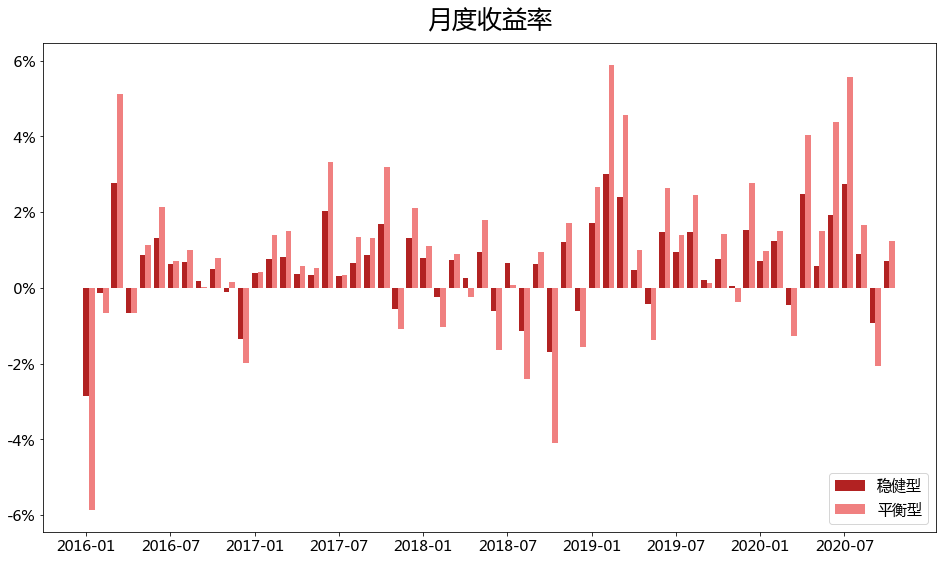

In [273]:
fig, ax = plt.subplots(figsize=(16, 9))

x = np.arange(mret_df.shape[0])

ax.bar(x, mret_df['28'], width=0.4, align='center', label='稳健型', color='firebrick')
ax.bar(x + 0.4, mret_df['46'], width=0.4, align='center', label='平衡型', color='lightcoral')

sx = range(0, mret_df.shape[0], 6)
ax.set_xticks(sx)
ax.set_xticklabels([e.strftime('%Y-%m') for e in mret_df.index[sx]])

ax.legend(fontsize=15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.0f}%'.format(x*100) for x in vals])

_ = ax.set_title(u'月度收益率', fontsize=25, y=1.02)

In [274]:
yret_df = pd.DataFrame()
yret_df['28'] = pf_ret_28.resample('Y').apply(lambda x: empyrical.cum_returns_final(x))
yret_df['46'] = pf_ret_46.resample('Y').apply(lambda x: empyrical.cum_returns_final(x))

In [275]:
yret_df

,28,46
2016-12-31,0.017479,0.015372
2017-12-31,0.093205,0.159101
2018-12-31,0.009206,-0.045956
2019-12-31,0.143885,0.254719
2020-12-31,0.102729,0.186737


In [314]:
mfund = pd.read_excel('../data/基金池.xlsx', sheet_name='混合')

In [315]:
data = w.wsd(mfund['code'].tolist(), 'nav_adj', start_date, end_date)

In [316]:
mfund_nav = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [317]:
mfund_pf_ret = mfund_nav.pct_change().mean(axis=1)

In [318]:
pf_ret_2575 = bfund_pf_ret * 0.5 + mfund_pf_ret * 0.5

[Text(0, 0, '0.90'),
 Text(0, 0, '1.00'),
 Text(0, 0, '1.10'),
 Text(0, 0, '1.20'),
 Text(0, 0, '1.30'),
 Text(0, 0, '1.40'),
 Text(0, 0, '1.50'),
 Text(0, 0, '1.60')]

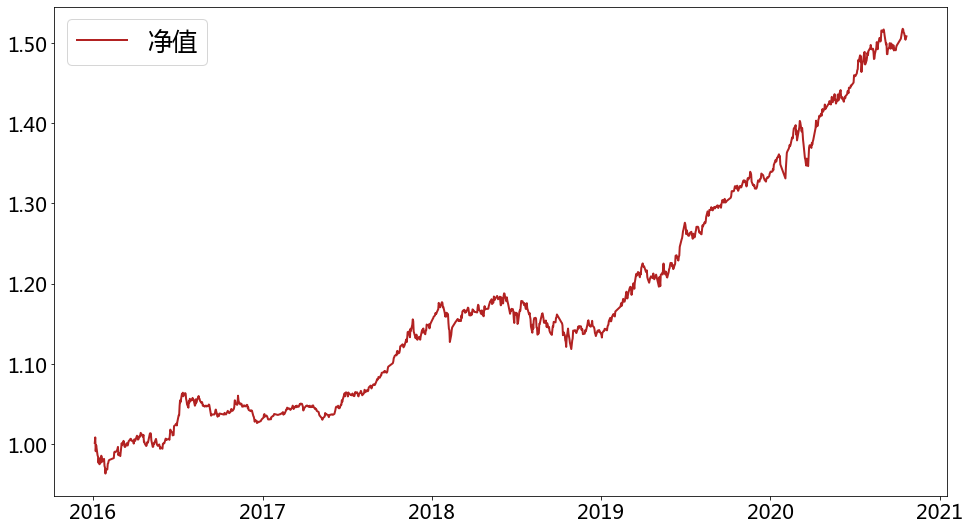

In [319]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_2575).cumprod(), label='净值', color='firebrick', linewidth=2)

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

# _ = ax.set_title('平衡型组合历史回测', fontsize=35, y=1.02)

In [320]:
metric(pf_ret_2575)

0.09281689246731073
0.05737472604610053
-0.05845494986308696
1.5772685590554234


In [312]:
metric(pf_ret_46)

0.1185945964239381
0.0815816734023726
-0.08266790788740906
1.4160467240906784


In [313]:
metric(pf_ret_19)

0.05849376635257575
0.020913380279496414
-0.018988425388889667
2.731295071688877


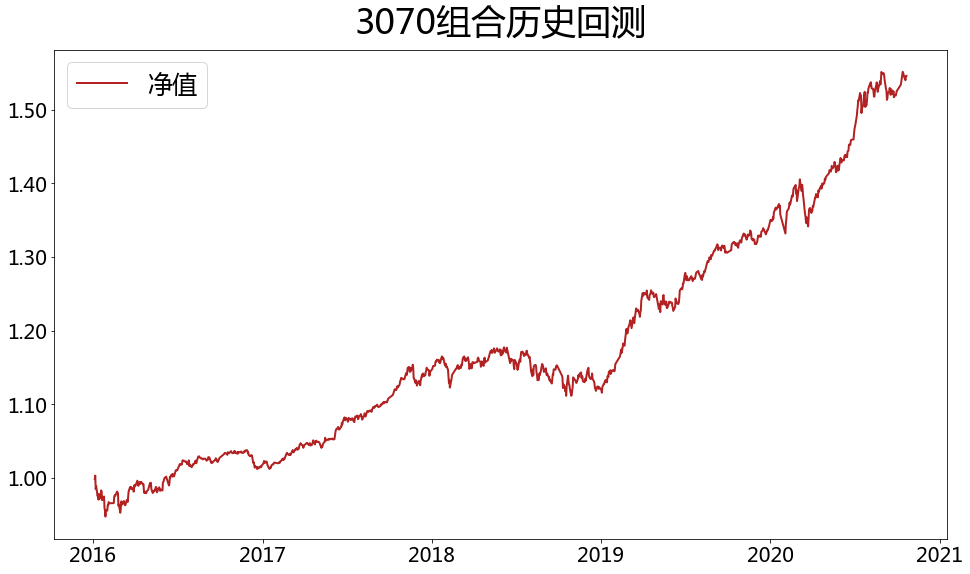

In [323]:
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot((1 + pf_ret_37).cumprod(), label='净值', color='firebrick', linewidth=2)
# ax.plot((1 + pf_ret_55).cumprod(), label='平衡型', color='blue')
# ax.plot((1 + pf_ret_82).cumprod(), label='80/20组合', color='black')

ax.legend(fontsize=25)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
vals = ax.get_yticks()
ax.set_yticklabels(['{:2.2f}'.format(x) for x in vals])

_ = ax.set_title('3070组合历史回测', fontsize=35, y=1.02)

In [324]:
metric(pf_ret_37)

0.09865537699097948
0.06116327132898419
-0.055995871703865004
1.5704824641915294
